In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from PIL import Image

In [98]:
data = keras.datasets.fashion_mnist.load_data()

In [35]:
(x_train, y_train), (x_test, y_test) = data

In [2]:
names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [43]:
y_train.shape


(60000,)

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10,activation = "softmax")
])

In [4]:
model.compile(optimizer ="adam", loss = "sparse_categorical_crossentropy", metrics =["accuracy"] )
model.fit(x_train, y_train,epochs = 3,batch_size=3)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("test Acc: ", test_acc)

NameError: name 'x_train' is not defined

In [59]:
(train_images, train_labels), (test_images, test_labels) = data
train_images = train_images/255.0
train_labels.dtype

dtype('uint8')

In [229]:
(train_images, train_labels), (test_images, test_labels) = data


train_images = train_images.reshape(60000,784)
test_images = test_images.reshape(10000, 784)
train_images = train_images/255.0
test_images = test_images/255.0
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10,activation = "softmax")
])
model.compile(optimizer ="adam", loss = "sparse_categorical_crossentropy", metrics =["accuracy"] )
model.fit(train_images,train_labels,epochs = 5,batch_size=2)
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("test Acc: ", test_acc,len(train_images))

Epoch 1/5
30000/30000 [==============================] - 28s 914us/step - loss: 0.4838 - accuracy: 0.8255
Epoch 2/5
30000/30000 [==============================] - 27s 889us/step - loss: 0.3874 - accuracy: 0.8611
Epoch 3/5
30000/30000 [==============================] - 27s 909us/step - loss: 0.3610 - accuracy: 0.8708
Epoch 4/5
30000/30000 [==============================] - 27s 909us/step - loss: 0.3447 - accuracy: 0.8769
Epoch 5/5
313/313 [==============================] - 0s 845us/step - loss: 0.4499 - accuracy: 0.8547
test Acc:  0.8547000288963318 60000


In [236]:
test_images = test_images.reshape(10000, 784)
model.predict([test_images[:1]])

array([[1.0817675e-08, 1.4640642e-08, 1.6378505e-17, 3.0366520e-09,
        3.4714878e-23, 5.5985030e-04, 1.9363497e-16, 9.6225314e-02,
        1.0213229e-09, 9.0321487e-01]], dtype=float32)

predict: Ankle boot Actual:  Ankle boot
predict: Pullover Actual:  Pullover
predict: Trouser Actual:  Trouser
predict: Trouser Actual:  Trouser
predict: Shirt Actual:  Shirt
predict: Trouser Actual:  Trouser
predict: Coat Actual:  Coat
predict: Shirt Actual:  Shirt
predict: Sandal Actual:  Sandal
predict: Sneaker Actual:  Sneaker


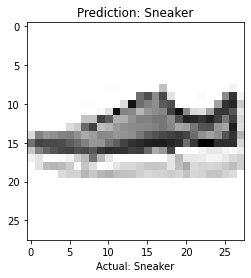

In [240]:
predict = model.predict(test_images)
for i in range(10):
    plt.grid(False)
    actual = test_labels[i]
    index =np.argmax(predict[i])
    print("predict:",names[index],"Actual: ", names[actual])
    plt.title(f"Prediction: {names[index]}")
    plt.xlabel(f"Actual: {names[actual]}")
    plt.imshow(test_images[i].reshape(28,28),cmap=plt.cm.binary)

In [241]:
from PIL import Image
image=Image.open("xx.jpg").convert('L')
new_img = np.array(image)
new_img.shape

(28, 28)

In [242]:
new_img = new_img/255.0
new_img

array([[0.18039216, 0.19607843, 0.2       , 0.17647059, 0.20784314,
        0.19607843, 0.18039216, 0.19607843, 0.18823529, 0.2       ,
        0.18039216, 0.20784314, 0.18431373, 0.20392157, 0.18823529,
        0.2       , 0.18431373, 0.19607843, 0.18823529, 0.19607843,
        0.18039216, 0.20392157, 0.19215686, 0.18823529, 0.19215686,
        0.18431373, 0.20392157, 0.42745098],
       [0.19607843, 0.2       , 0.18431373, 0.21176471, 0.17254902,
        0.18823529, 0.2       , 0.18823529, 0.20392157, 0.20392157,
        0.18823529, 0.18431373, 0.2       , 0.19607843, 0.19607843,
        0.18431373, 0.19607843, 0.19215686, 0.18823529, 0.19607843,
        0.19215686, 0.18823529, 0.20392157, 0.18823529, 0.19215686,
        0.18823529, 0.18039216, 0.28235294],
       [0.19215686, 0.16862745, 0.19607843, 0.18431373, 0.2       ,
        0.17647059, 0.19215686, 0.20784314, 0.18039216, 0.17647059,
        0.21176471, 0.18823529, 0.17647059, 0.20784314, 0.18823529,
        0.40784314, 0.2196

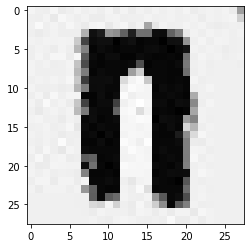

In [243]:

plt.grid(False)
plt.imshow(new_img,cmap=plt.cm.binary)


In [257]:
g = [new_img.reshape(1,784)]
model.predict(g)

array([[1.3466771e-03, 7.6637673e-01, 4.5009414e-03, 5.7941979e-06,
        1.8783582e-03, 2.0714943e-09, 5.0801984e-03, 1.1667118e-08,
        2.2081128e-01, 1.1952379e-13]], dtype=float32)

In [258]:
#index = np.argmax(model.predict([new_img]))
#names[index]
index_predict = np.argmax(model.predict(g))
names[index_predict]

'Trouser'

In [209]:
b= model.predict(img.reshape(1,28,28))
c= np.argmax(b)

In [113]:
index,c

(8, 8)

In [217]:
b


array([[5.1694946e-18, 0.0000000e+00, 1.2300757e-25, 0.0000000e+00,
        0.0000000e+00, 5.4682538e-30, 5.7372968e-19, 1.8755925e-24,
        1.0000000e+00, 6.8416807e-25]], dtype=float32)

In [122]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

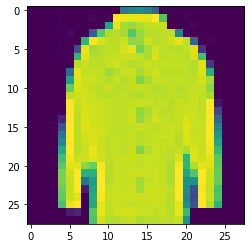

In [144]:

plt.imshow(test_images[14])

In [216]:
np.argmax(model.predict(img.reshape(1,28,28)))

8

In [172]:
test_labels[14]

4

In [181]:
model.predict(img.reshape(1,28,28))

array([[8.3603827e-12, 4.4953389e-36, 1.3760809e-17, 5.2290319e-34,
        1.1940832e-13, 2.7634657e-18, 1.7667929e-08, 1.5433586e-28,
        1.0000000e+00, 1.0255921e-27]], dtype=float32)